In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import pylab
import seaborn as sns

In [4]:
# Load up codebook
pc = pd.DataFrame.from_csv('cap-data/recs2009_public_codebook_simple.csv', index_col= None, encoding = 'utf-8')

In [5]:
# Separate response codes and labels
pc['Response Codes']=[x.split('\r') if type(x) == str else x for x in pc['Response Codes']]
pc['Response Labels']=[x.split('\r') if type(x) == str else x for x in pc['Response Labels']]
pc = pc.ix[:930] # last 3 lines unnecessary
pc.tail()

,Variable Name,Variable Description,Response Codes,Response Labels,Electricity,Natural Gas,Propane,Fuel Oil,Kerosene
926,SCALELP,Whether annualized LPG/propane consumption fro...,"[0, 1, , 2, , 3, -2]","[Not scaled down, Scaled down because billing ...",NaN,NaN,NaN,NaN,NaN
927,PERIODFO,Number of days covered by Energy Supplier Surv...,"[1, 2, 5, -2]","[365 days (complete), Less than 365 days (inco...",NaN,NaN,NaN,NaN,NaN
928,SCALEFO,Whether annualized fuel oil consumption from E...,"[0, 1, , 2, , 3, -2]","[Not scaled down, Scaled down because billing ...",NaN,NaN,NaN,NaN,NaN
929,PERIODKR,Number of days covered by Energy Supplier Surv...,"[1, 2, 5, -2]","[365 days (complete), Less than 365 days (inco...",NaN,NaN,NaN,NaN,NaN
930,SCALEKER,Whether annualized kerosene consumption from E...,"[0, 1, , 2, , 3, -2]","[Not scaled down, Scaled down because billing ...",NaN,NaN,NaN,NaN,NaN


In [6]:
# Imputations are the EIA's guesses at filling in blank forms. Since blanks are few, imputation will be ignored.
# (Come up with better reaosn to ignore imputation error)
no_imp = pc[pc['Variable Description'].str.contains('Imputation flag for') != True]
no_imp.head()

,Variable Name,Variable Description,Response Codes,Response Labels,Electricity,Natural Gas,Propane,Fuel Oil,Kerosene
0,DOEID,Unique identifier for each respondent,[00001 - 12083],[Unique identifier for each respondent],NaN,NaN,NaN,NaN,NaN
1,REGIONC,Census Region,"[1, 2, 3, 4]","[Northeast Census Region, Midwest Census Regio...",NaN,NaN,NaN,NaN,NaN
2,DIVISION,Census Division,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[New England Census Division (CT, MA, ME, NH, ...",NaN,NaN,NaN,NaN,NaN
3,REPORTABLE_DOMAIN,Reportable states and groups of states,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[, Connecticut, Maine, New Hampshire, Rhode Is...",NaN,NaN,NaN,NaN,NaN
4,TYPEHUQ,Type of housing unit,"[1, 2, 3, 4, 5]","[Mobile Home, Single-Family Detached, Single-F...",OTH_B,SPH_A,NaN,NaN,NaN


In [7]:
# Separate numeric responses
num_resp = no_imp[no_imp['Response Codes'].isnull() == True]
num_resp

,Variable Name,Variable Description,Response Codes,Response Labels,Electricity,Natural Gas,Propane,Fuel Oil,Kerosene
5,NWEIGHT,Final sample weight,NaN,[Final sample weight],NaN,NaN,NaN,NaN,NaN
6,HDD65,"Heating degree days in 2009, base temperature 65F",NaN,"[Heating degree days in 2009, base temperature...","SPH_B, WTH_A",SPH_B,"SPH_B, OTH_B","SPH_B, OTH_B","SPH_B, OTH_B"
7,CDD65,"Cooling degree days in 2009, base temperature 65F",NaN,"[Cooling degree days in 2009, base temperature...",COL_B,NaN,NaN,NaN,NaN
8,HDD30YR,"Heating degree days, 30-year average 1981-2010...",NaN,"[Heating degree days, 30-year average 1981-201...",NaN,NaN,NaN,NaN,NaN
9,CDD30YR,"Cooling degree days, 30-year average 1981-2010...",NaN,"[Cooling degree days, 30-year average 1981-201...",NaN,NaN,NaN,NaN,NaN
827,TOTSQFT,Total square footage (includes all attached ga...,NaN,[Square Feet],NaN,NaN,NaN,NaN,NaN
828,TOTSQFT_EN,Total square footage (includes heated/cooled g...,NaN,[Square Feet],OTH_B,NaN,NaN,NaN,NaN
829,TOTHSQFT,Total heated square footage,NaN,[Square Feet],SPH_B,SPH_B,"SPH_B, OTH_B","SPH_B, OTH_B","SPH_B, WTH_B, OTH_B"
830,TOTUSQFT,Total unheated square footage,NaN,[Square Feet],NaN,NaN,NaN,NaN,NaN
831,TOTCSQFT,Total cooled square footage,NaN,[Square Feet],NaN,NaN,NaN,NaN,NaN


In [8]:
# Separate categorical responses
cat_resp = no_imp[no_imp['Response Codes'].isnull() == False]
cat_resp

,Variable Name,Variable Description,Response Codes,Response Labels,Electricity,Natural Gas,Propane,Fuel Oil,Kerosene
0,DOEID,Unique identifier for each respondent,[00001 - 12083],[Unique identifier for each respondent],NaN,NaN,NaN,NaN,NaN
1,REGIONC,Census Region,"[1, 2, 3, 4]","[Northeast Census Region, Midwest Census Regio...",NaN,NaN,NaN,NaN,NaN
2,DIVISION,Census Division,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[New England Census Division (CT, MA, ME, NH, ...",NaN,NaN,NaN,NaN,NaN
3,REPORTABLE_DOMAIN,Reportable states and groups of states,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[, Connecticut, Maine, New Hampshire, Rhode Is...",NaN,NaN,NaN,NaN,NaN
4,TYPEHUQ,Type of housing unit,"[1, 2, 3, 4, 5]","[Mobile Home, Single-Family Detached, Single-F...",OTH_B,SPH_A,NaN,NaN,NaN
10,Climate_Region_Pub,Building America Climate Region (collapsed for...,"[1, 2, 3, 4, 5]","[Very Cold/Cold, Hot-Dry/Mixed-Dry, Hot-Humid,...",NaN,NaN,NaN,NaN,NaN
11,AIA_Zone,"AIA Climate Zone, based on average temperature...","[1, 2, 3, 4, 5]","[Less than 2,000 CDD and greater than 7,000 HD...",SPH_A,SPH_A,NaN,NaN,NaN
12,METROMICRO,Housing unit in Census Metropolitan Statistica...,"[METRO, MICRO, NONE]",[Housing unit in Census Metropolitan Statistic...,NaN,NaN,NaN,NaN,NaN
13,UR,Housing unit classified as urban or rural by C...,"[U, R]","[Urban, Rural]",NaN,NaN,NaN,NaN,NaN
14,KOWNRENT,"Housing unit is owned, rented, or occupied wit...","[1, 2, 3]","[Owned by someone in the household, Rented, Oc...",NaN,NaN,NaN,NaN,NaN


# Linear Regression Analysis for Variables with Numeric Responses

In [9]:
# Load up microdata
data = pd.DataFrame.from_csv('cap-data/recs2009_public.csv', index_col = None, encoding = 'utf-8')
data.head(3)

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER
0,1,2,4,12,2,2471.679705,4742,1080,4953,1271,...,0,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,2,4,10,26,2,8599.172010,2662,199,2688,143,...,0,1,1,0,-2,-2,-2,-2,-2,-2
2,3,1,1,1,5,8969.915921,6233,505,5741,829,...,0,3,5,3,-2,-2,-2,-2,-2,-2


In [10]:
# Sort out data from micro data that has numerical responses
num_data = data[data.columns[[num_resp.index]]]
num_data.head()

,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,TOTSQFT,TOTSQFT_EN,TOTHSQFT,TOTUSQFT,TOTCSQFT,...,TOTALBTUCOL,TOTALBTUWTH,TOTALBTURFG,TOTALBTUOTH,TOTALDOL,TOTALDOLSPH,TOTALDOLCOL,TOTALDOLWTH,TOTALDOLRFG,TOTALDOLOTH
0,2471.679705,4742,1080,4953,1271,5075,4675,3958,1118,3958,...,10471,10128,5171,26363,1315,227,219,211,108,550
1,8599.172010,2662,199,2688,143,3136,2736,2736,400,2736,...,621,30110,4470,29653,1293,368,17,287,121,501
2,8969.915921,6233,505,5741,829,528,528,528,0,264,...,629,7933,3124,6781,1327,582,49,115,243,339
3,18003.639600,6034,672,5781,868,2023,1623,1623,400,1623,...,3627,6440,5700,20438,1398,425,101,179,159,534
4,5999.605242,5388,702,5313,797,1912,1912,1274,637,0,...,0,13884,1182,8607,1558,616,0,237,85,620


In [11]:
# This section calculates the R-val when a line is fitted to a plot of EUI vs each variable in data

kwh = data['KWH']
sqft = data['TOTSQFT_EN']
eui = kwh/sqft

i = 0
y = eui
r_vals = pd.DataFrame(columns = ["variable", "rval","abs_rval","variable_description"])
for col in num_data:
    x = num_data[num_data.columns[i]]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    r_vals.loc[len(r_vals)] = [num_data.columns[i], r_value, abs(r_value), 
                               num_resp[num_resp['Variable Name'] == num_data.columns[i]]['Variable Description']]
    i += 1

r_vals.sort_values(by = 'abs_rval', ascending=False).head()

,variable,rval,abs_rval,variable_description
14,KWHWTH,0.556486,0.556486,"842 Electricity usage for water heating, in..."
20,BTUELWTH,0.556486,0.556486,"848 Electricity usage for water heating, in..."
18,BTUELSPH,0.512364,0.512364,"846 Electricity usage for space heating, in..."
12,KWHSPH,0.512364,0.512364,"840 Electricity usage for space heating, in..."
26,DOLELWTH,0.504838,0.504838,"854 Electricity cost for water heating, in ..."


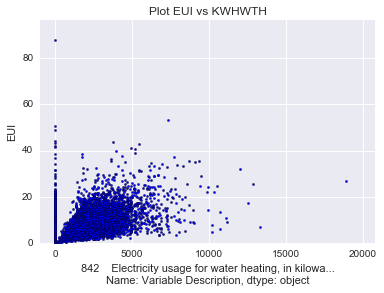

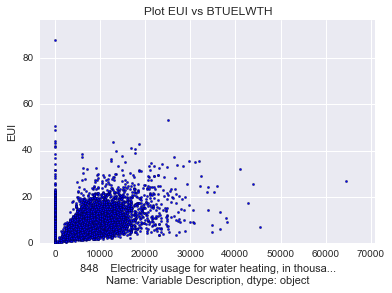

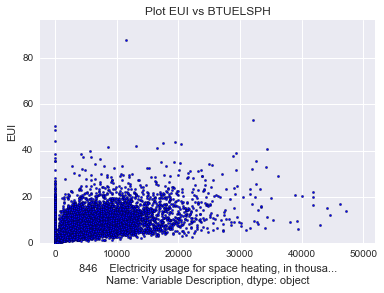

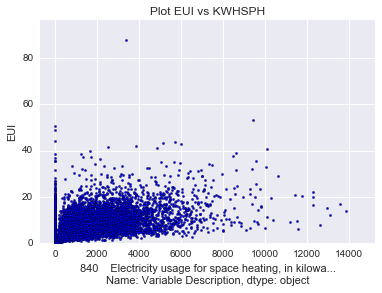

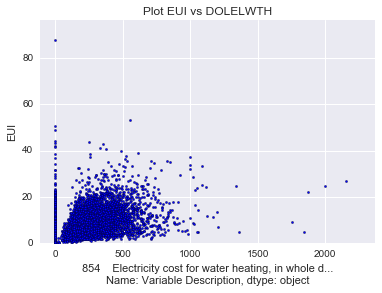

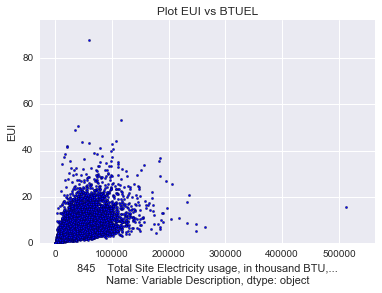

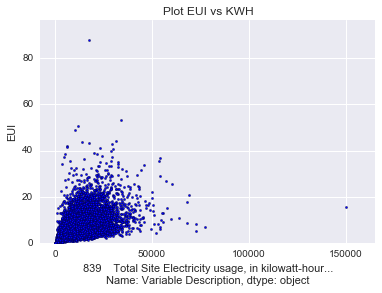

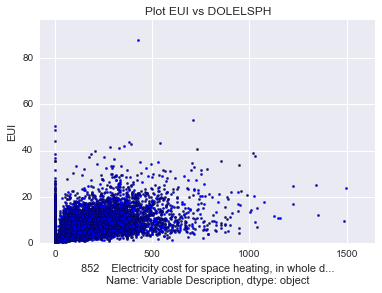

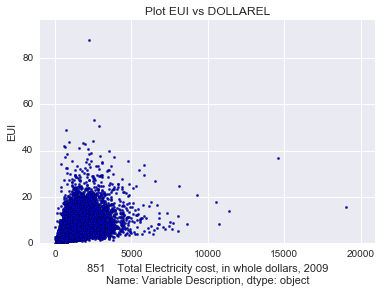

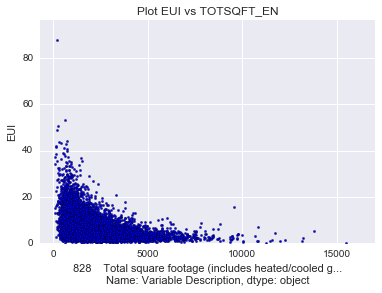

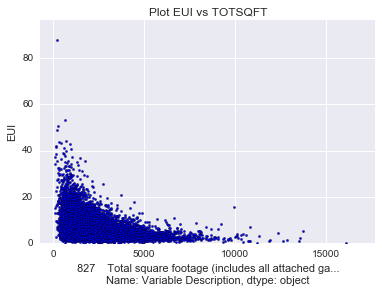

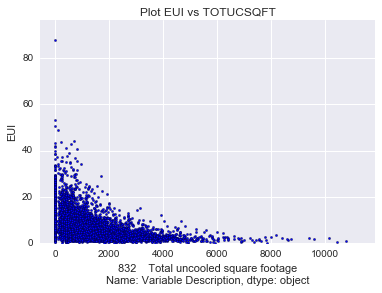

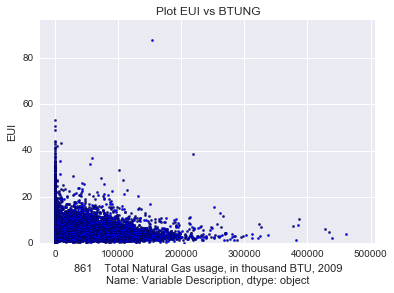

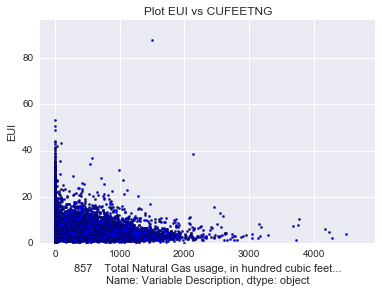

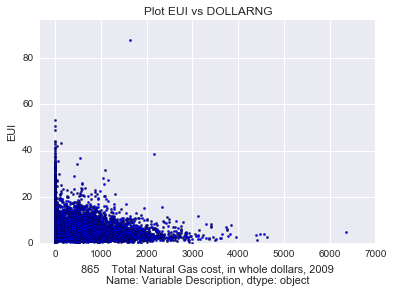

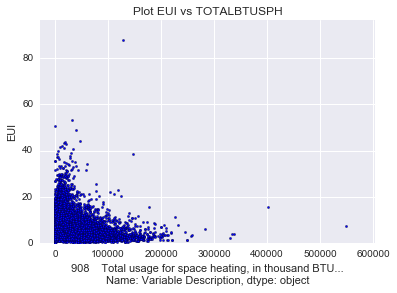

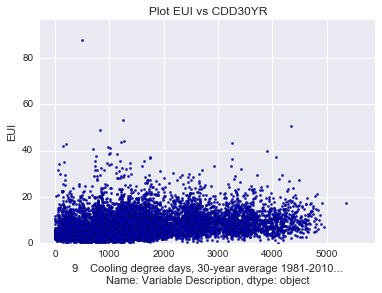

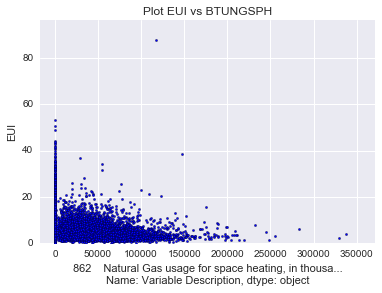

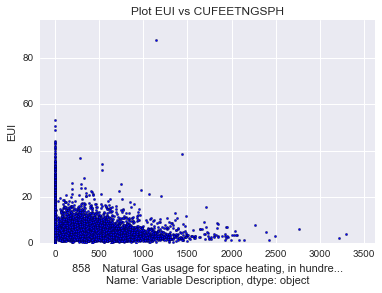

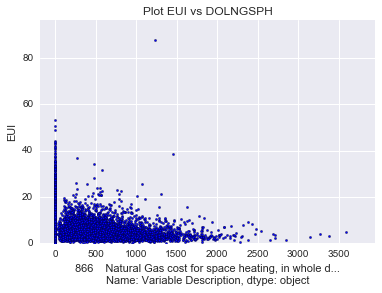

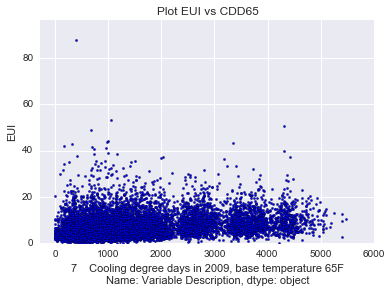

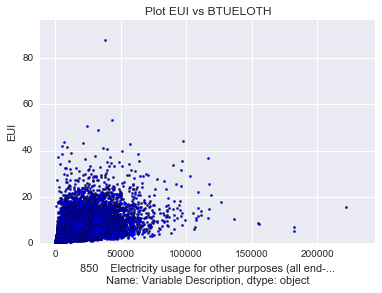

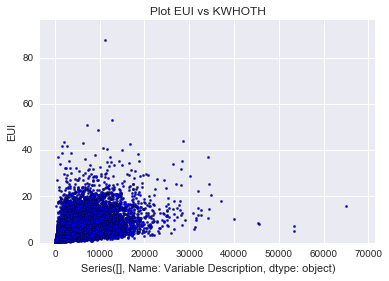

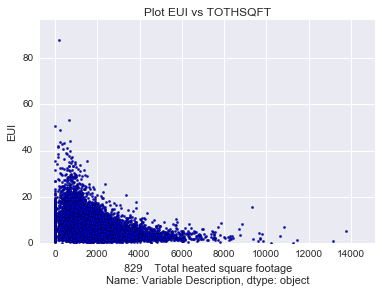

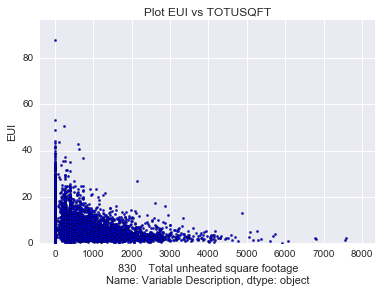

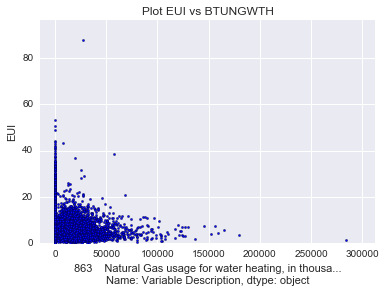

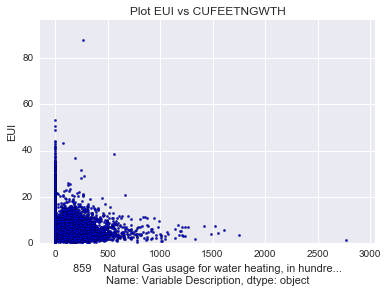

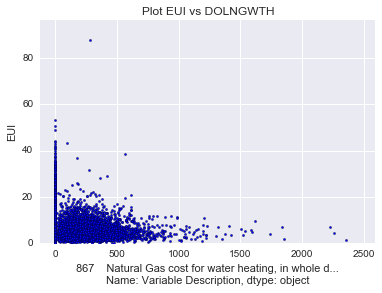

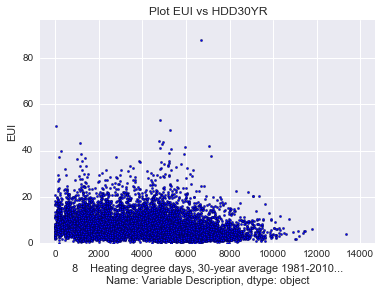

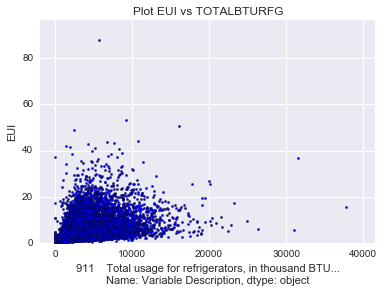

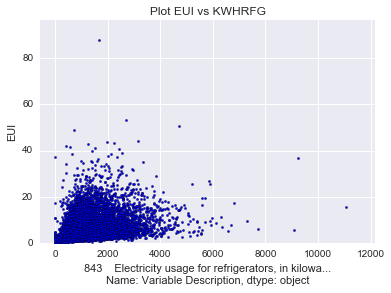

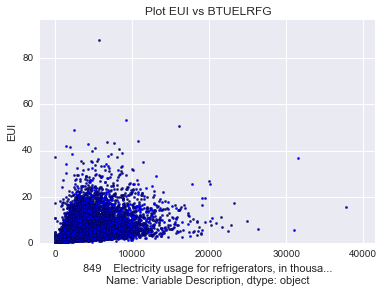

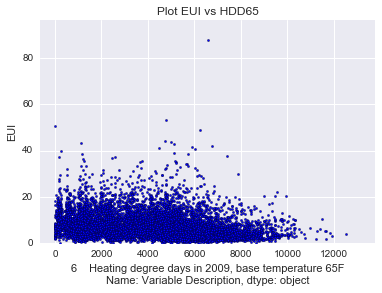

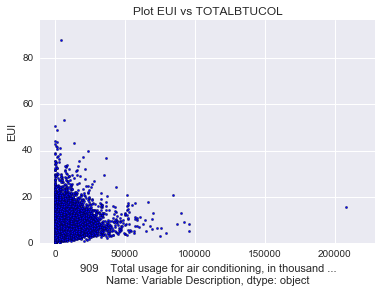

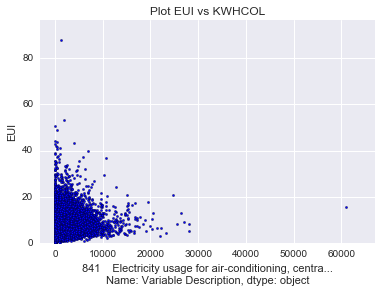

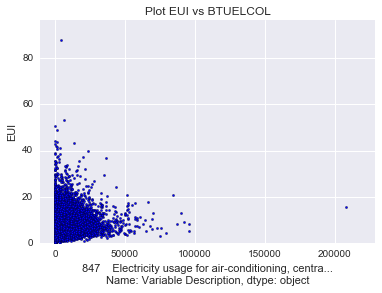

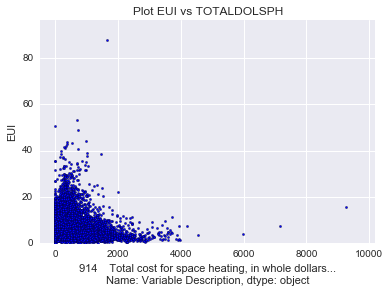

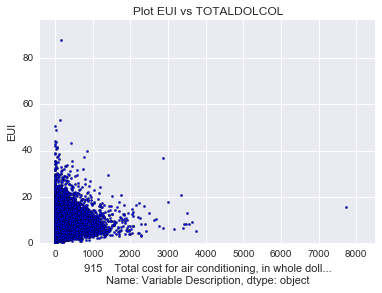

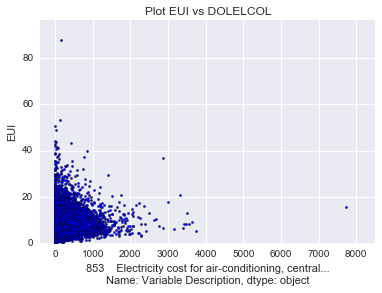

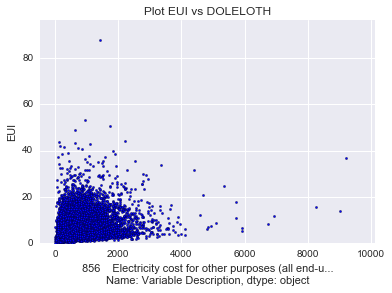

In [12]:
# This section plots the data (EUI vs variable) of the top 40 highest r-values for visual inspection


topr = r_vals.sort_values(by = 'abs_rval', ascending=False) # sort r-values from above with highest at top
topr = topr.iloc[:40]

y = eui # y-axis will be eui in each graph
ymax = max(y) + 0.1*max(y)
ymin = 0
i = 0
for var in topr.variable:
    x = data[var]
    plt.scatter(x,y, marker = ".")
    plt.title("Plot EUI vs " + var)# + ': ' + topr.variable_description.iloc[i])
    plt.xlim([min(x)-0.05*max(x),max(x)+0.1*max(x)])
    plt.ylim([ymin,ymax])
    plt.ylabel('EUI')
    plt.xlabel(topr.variable_description.iloc[i])
    plt.show()
    i += 1

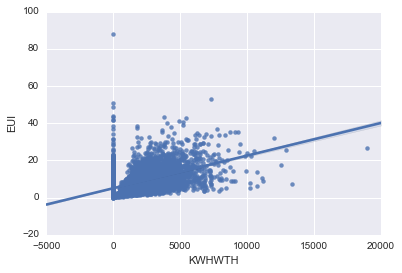

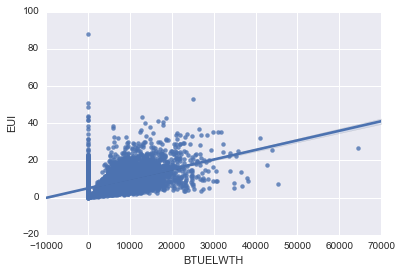

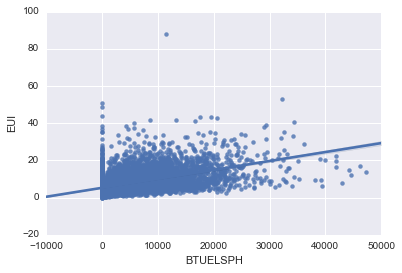

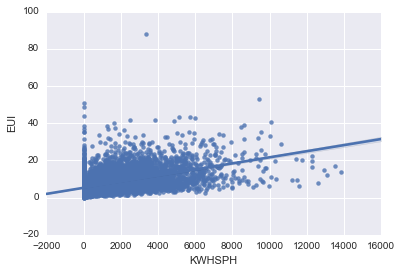

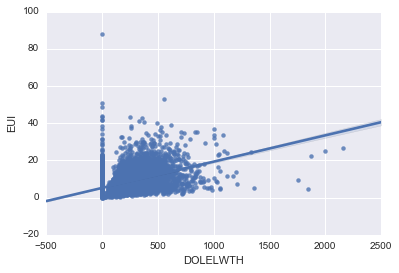

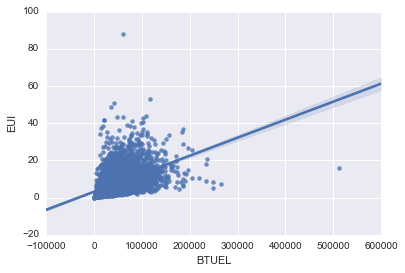

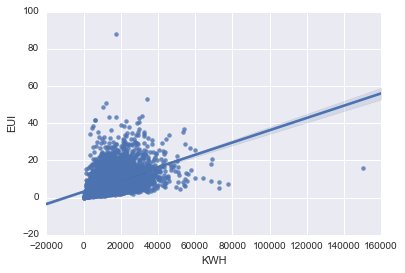

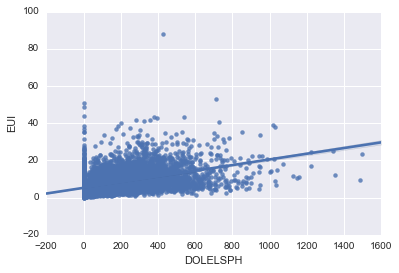

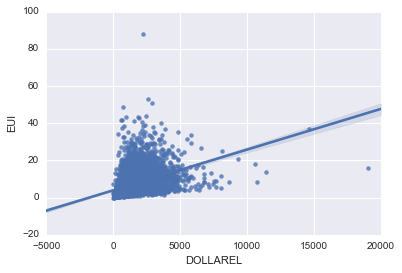

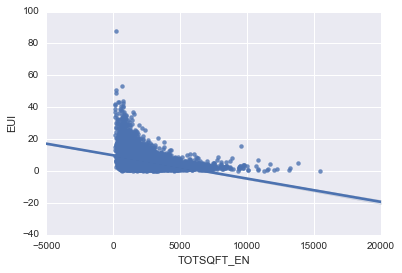

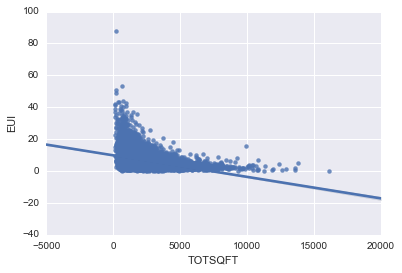

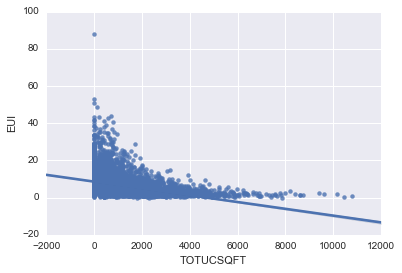

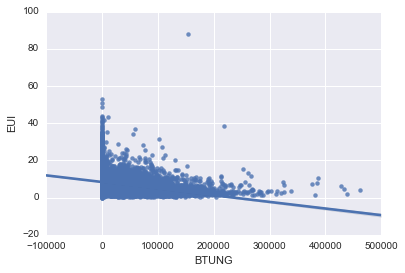

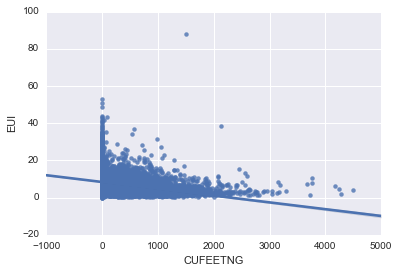

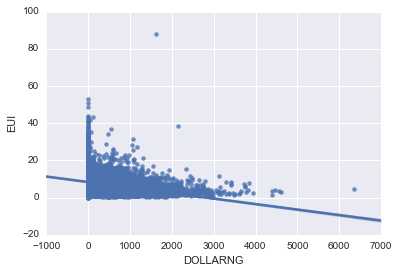

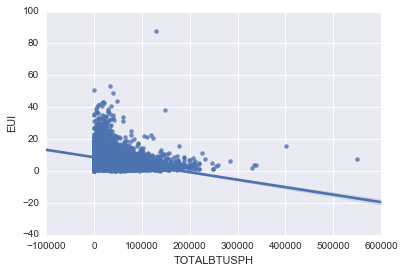

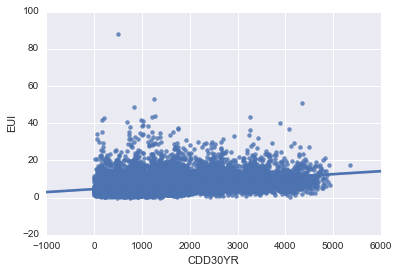

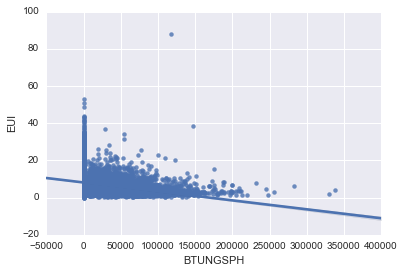

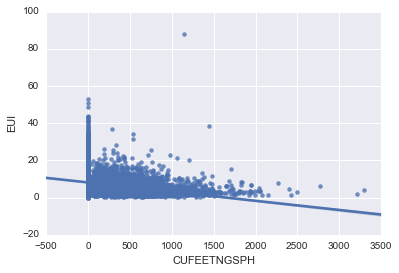

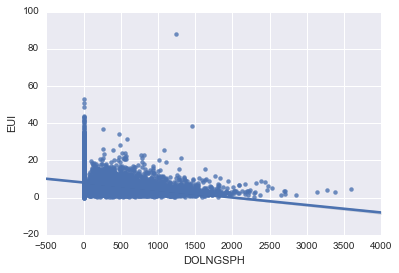

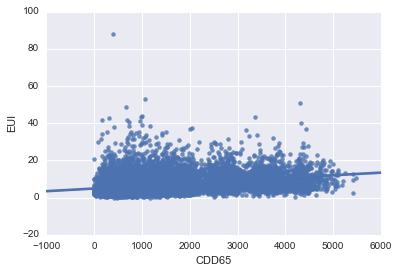

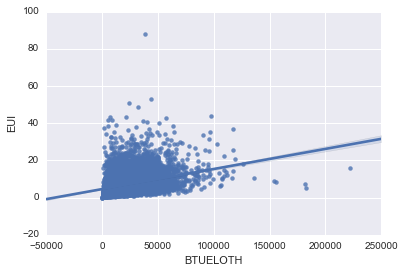

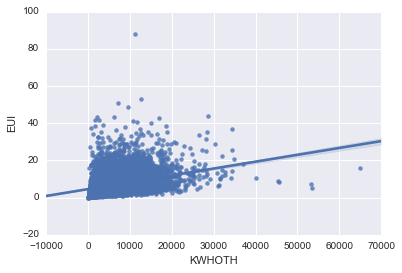

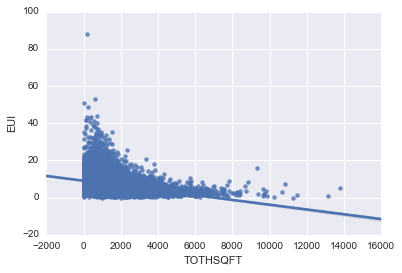

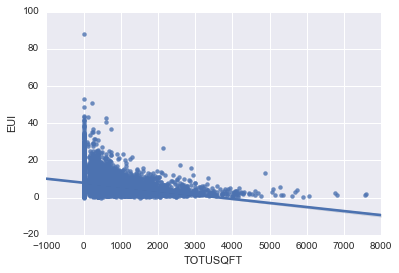

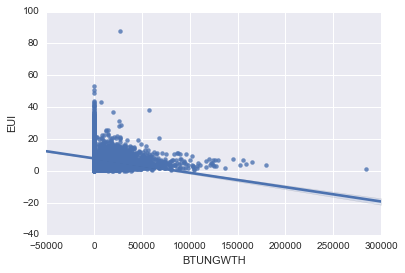

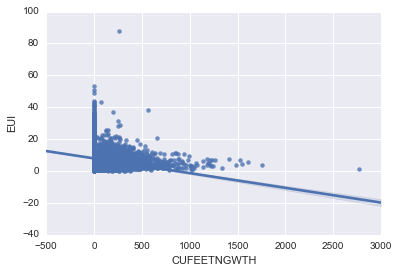

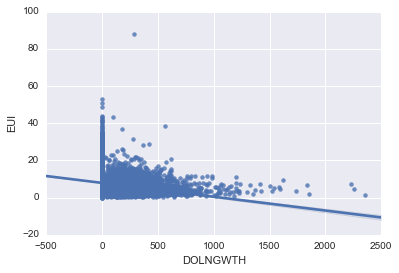

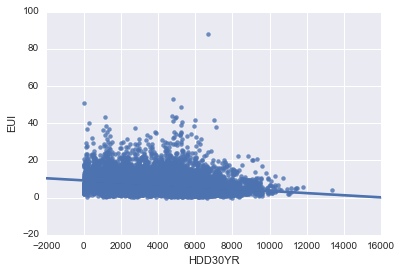

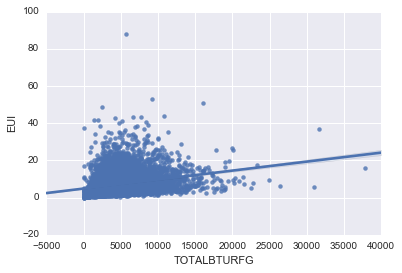

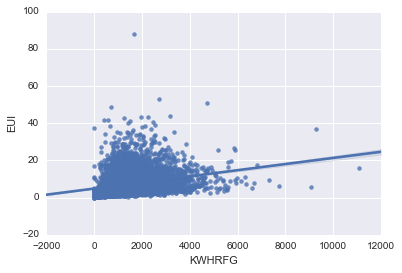

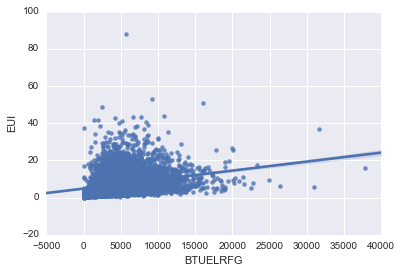

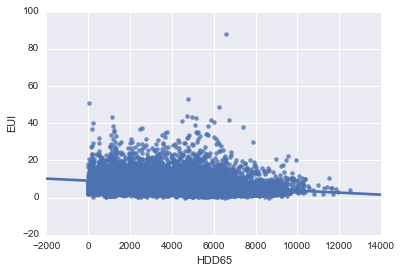

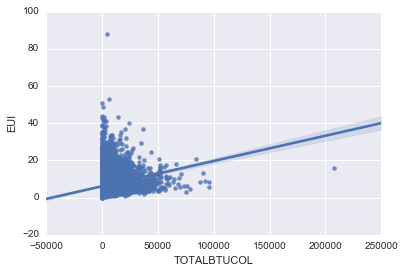

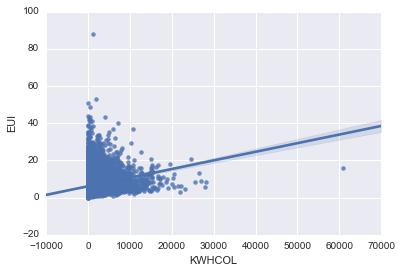

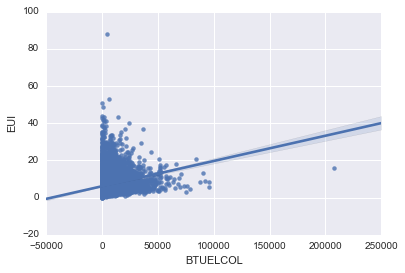

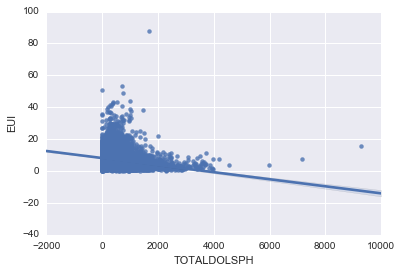

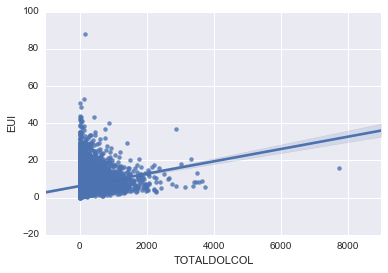

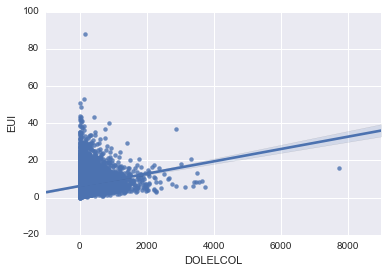

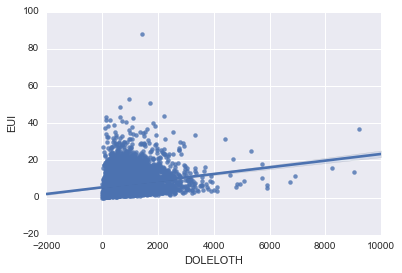

In [19]:
# # This section plots the data (EUI vs variable) of the top 40 highest r-values for visual inspection

# data['EUI'] = eui

# topr = r_vals.sort_values(by = 'abs_rval', ascending=False) # sort r-values from above with highest at top
# topr = topr.iloc[:40]

# y = eui # y-axis will be eui in each graph
# ymax = max(y) + 0.1*max(y)
# ymin = 0
# i = 0
# for var in topr.variable:
#     x = data[var]
#     sns.regplot(y = 'EUI', x = var, data = data)
#     plt.show()
#     plt.cla